In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
from utils import load_npy, print_classification_report, plot_confusion_matrix, get_f1_score
from plot import plot_embeddings_pca, plot_embeddings_tsne, plot_embeddings_umap
import torch
from pathlib import Path
from torch.utils.data import DataLoader, Dataset
import numpy as np

/Users/ahmed/Lnlp/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/ahmed/Lnlp/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/ahmed/Lnlp/lib/python3.11/site-packages/umap/distances.py:1086: NumbaDeprecationWarning: The 'nop

# Model

In [2]:
reduced_model_params = 11_852_814
full_model_params = 152_086_874

reduction_percentage = (full_model_params - reduced_model_params) / full_model_params * 100
print(f"The model size was reduced by {reduction_percentage:.2f}%")

The model size was reduced by 92.21%


# Load Data

In [3]:
from data import SequenceClassificationDataset

root = './'
cl_train_dataset = SequenceClassificationDataset(Path(root, 'train_scibert.json'))
cl_dev_dataset = SequenceClassificationDataset(Path(root, 'dev_scibert.json'))
cl_test_dataset = SequenceClassificationDataset(Path(root, 'test_scibert.json'))

batch_size=1
train_dataloader = DataLoader(cl_train_dataset, batch_size=batch_size, shuffle=True)
valid_dataloader = DataLoader(cl_dev_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(cl_test_dataset, batch_size=batch_size, shuffle=True)

In [4]:
datastore_keys = torch.from_numpy(load_npy('newbaseline_datastore_keys.npy'))
datastore_values = torch.from_numpy(load_npy('newbaseline_datastore_values.npy'))

datastore_keys.shape, datastore_values.shape

(torch.Size([1, 10540, 768]), torch.Size([1, 10540]))

In [5]:
embeddings = torch.from_numpy(load_npy('newbaseline_test_embeddings.npy'))
labels = torch.from_numpy(load_npy('newbaseline_test_labels.npy'))
logits = torch.from_numpy(load_npy('newbaseline_test_logits.npy'))
predicted_labels = torch.from_numpy(load_npy('newbaseline_test_predicted_labels.npy'))

embeddings.shape, labels.shape, logits.shape, predicted_labels.shape

(torch.Size([1, 1338, 768]),
 torch.Size([1, 1338]),
 torch.Size([1, 1338, 7]),
 torch.Size([1, 1338]))

# Baseline Only

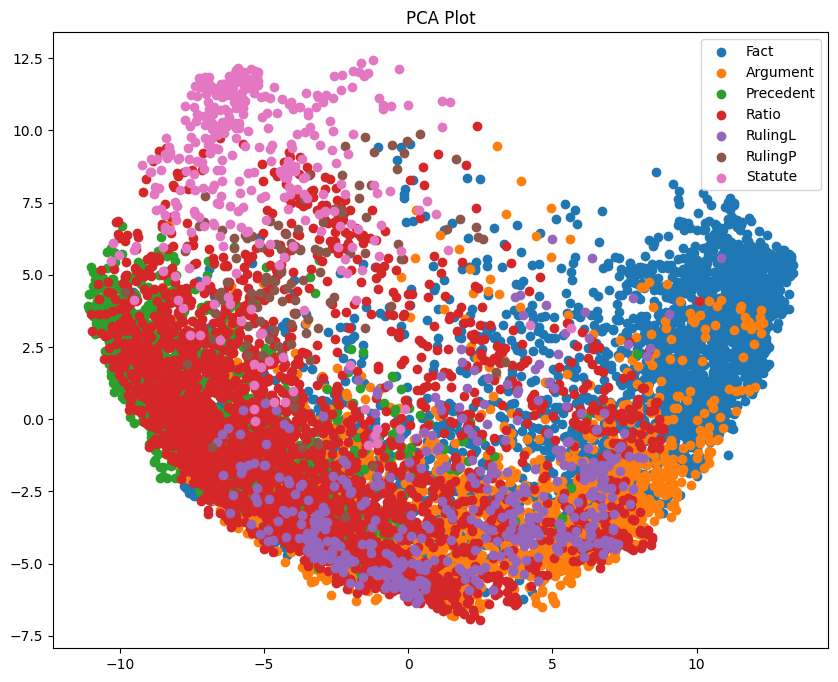

In [12]:
plot_embeddings_pca(datastore_keys, datastore_values)

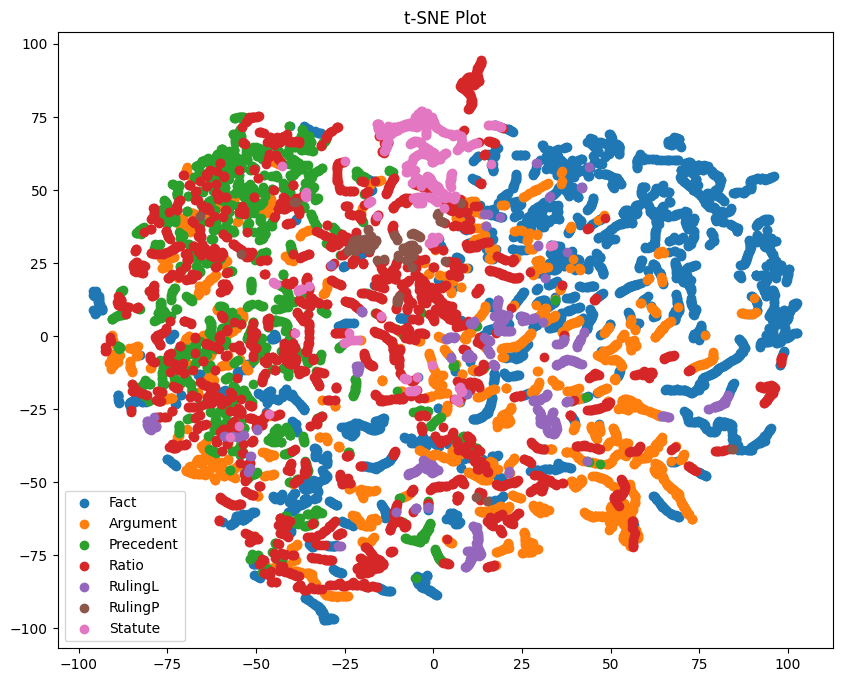

In [8]:
plot_embeddings_tsne(datastore_keys, datastore_values)

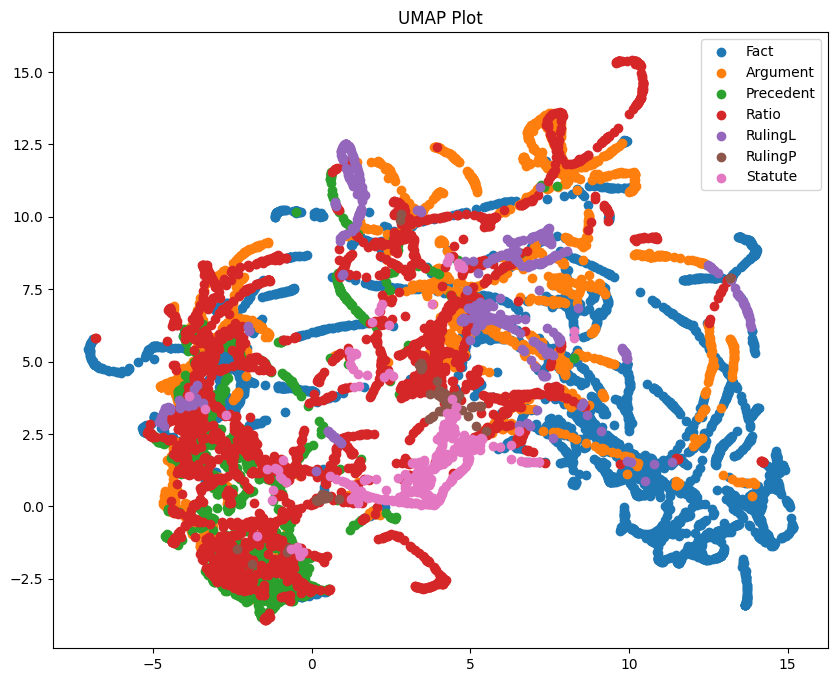

In [9]:
plot_embeddings_umap(datastore_keys, datastore_values)